# Amazon Review Data Exploration

https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt

SAMPLE CONTENT:
https://s3.amazonaws.com/amazon-reviews-pds/tsv/sample_us.tsv
https://s3.amazonaws.com/amazon-reviews-pds/tsv/sample_fr.tsv

|DATA COLUMNS:| Description |
|-------------|--------|
|marketplace       | 2 letter country code of the marketplace where the review was written. |
|customer_id       | Random identifier that can be used to aggregate reviews written by a single author. |
|review_id         | The unique ID of the review. |
|product_id        | The unique Product ID the review pertains to. In the multilingual dataset the reviews                    for the same product in different countries can be grouped by the same product_id. |
|product_parent    | Random identifier that can be used to aggregate reviews for the same product. |
|product_title     | Title of the product. |
|product_category  | Broad product category that can be used to group reviews (also used to group the dataset into coherent parts). |
|star_rating       | The 1-5 star rating of the review. |
|helpful_votes     | Number of helpful votes. |
|total_votes       | Number of total votes the review received. |
|vine              | Review was written as part of the Vine program. |
|verified_purchase | The review is on a verified purchase. |
|review_headline   | The title of the review. |
|review_body       | The review text. |
|review_date       | The date the review was written. |

DATA FORMAT
Tab ('\t') separated text file, without quote or escape characters.
First line in each file is header; 1 line corresponds to 1 record.


In [31]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# global variables
COLUMNS_TO_DROP=["marketplace", "vine", "verified_purchase"]
USE_PANDAS=True
SEPERATOR=","


# full 9mil Wireless reviews - not enough memory locally to do this
ORIG_FILE_WIRELESS="dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00.tsv"

In [2]:
# sample original file to create smaller files with different sampling rates to inspect

from file_util import convert_tsv_to_csv

# about 360k
DATA_FILE_SMALL = "dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00-small.csv"
# about 450k
DATA_FILE_MEDIUM = "dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00-medium.csv"
# about 900k
DATA_FILE_LARGE = "dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00-large.csv"

# already ran this
# convert_tsv_to_csv(ORIG_FILE_WIRELESS, DATA_FILE_SMALL, 25)
# convert_tsv_to_csv(ORIG_FILE_WIRELESS, DATA_FILE_MEDIUM, 20)
# convert_tsv_to_csv(ORIG_FILE_WIRELESS, DATA_FILE_LARGE, 10)


DATA_FILE=DATA_FILE_MEDIUM

# Reading File With Pandas

## This method does not seem to work. It starts merging multiple lines into the healine column of the dataframe

In [30]:

# if USE_PANDAS == True:

#     # pandas is doing something weird. The lines that says have bad number of columns actually have the right columns???
#     reviews = pd.read_csv(DATA_FILE, sep=SEPERATOR, 
#                              parse_dates=["review_date"], 
#                              warn_bad_lines=True, 
#                              error_bad_lines=False)
#     reviews.info()

## pandas for some reason does not read the amazon TSV correctly and starts to merge lines together. Originally, I tried this method to construct the DataFrame but this proved to be very inefficient and slow. Took about 30 minutes to create a DF that had about 100k entries

commenting out since we won't be needing this

In [34]:
# not quite ready
# if USE_PANDAS == False:

#     columns = ["marketplace", "customer_id", "review_id", "product_id",
#               "product_parent", "product_title", "product_category", 
#               "star_rating", "helpful_votes", "total_votes", "vine",
#               "verified_purchase", "review_headline", "review_body",
#               "review_date"]
#     reviews = pd.DataFrame(columns = columns)
#     count = 0
#     with open(DATA_FILE, "r") as file:
#         for line in file:
#             if len(line) > 0:
#                 line = line.rstrip("\n")
#                 # skip the header
#                 if count > 0:
#                     splitted = line.split("\t")
#                     reviews = reviews.append(pd.Series(splitted, index=columns), 
#                                    ignore_index=True)
#                 count += 1
#                 if count % 10000 == 0:
#                     print(f"processed {count}")

#     print(len(reviews))

    
# reviews.info()

In [37]:
# if we don't use pandas, we have to set datatypes for the columns
# if USE_PANDAS == False:
#     reviews = reviews.astype({
#         "review_date": np.datetime64,
#         "star_rating": np.int64,
#         "helpful_votes": np.int64,
#         "total_votes": np.int64
#     })
# reviews.info()

## Finally, wrote a utility to convert the file from TSV to CSV by stripping newlines and replacing tabs with , without dataframe seems to be more efficient

We won't run this again since I've already created the files

In [36]:
# sample original file to create smaller files with different sampling rates to inspect

from file_util import convert_tsv_to_csv

# about 300068 reviews
DATA_FILE_SMALL = "dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00-small.csv"
# about 450101 reviews
DATA_FILE_MEDIUM = "dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00-medium.csv"
# about 900203 reviews
DATA_FILE_LARGE = "dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00-large.csv"

# already ran this
# convert_tsv_to_csv(ORIG_FILE_WIRELESS, DATA_FILE_SMALL, 25)
# convert_tsv_to_csv(ORIG_FILE_WIRELESS, DATA_FILE_MEDIUM, 20)
# convert_tsv_to_csv(ORIG_FILE_WIRELESS, DATA_FILE_LARGE, 10)


DATA_FILE=DATA_FILE_MEDIUM

# Now that we have data files we can use Pands

In [35]:
reviews = pd.read_csv(DATA_FILE, sep=SEPERATOR, 
                         parse_dates=["review_date"])
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450101 entries, 0 to 450100
Data columns (total 15 columns):
marketplace          450101 non-null object
customer_id          450101 non-null int64
review_id            450101 non-null object
product_id           450101 non-null object
product_parent       450101 non-null int64
product_title        450101 non-null object
product_category     450101 non-null object
star_rating          450101 non-null int64
helpful_votes        450101 non-null int64
total_votes          450101 non-null int64
vine                 450101 non-null object
verified_purchase    450101 non-null object
review_headline      450097 non-null object
review_body          450076 non-null object
review_date          450101 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 51.5+ MB


In [38]:
# looks like sometimes we have reviews with no body, no headline, and no review dates
# let's drop those rows with missing data
# also drop the following columns since they will always be the same
clean_df = reviews.dropna().drop(COLUMNS_TO_DROP, axis = 1)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450072 entries, 0 to 450100
Data columns (total 12 columns):
customer_id         450072 non-null int64
review_id           450072 non-null object
product_id          450072 non-null object
product_parent      450072 non-null int64
product_title       450072 non-null object
product_category    450072 non-null object
star_rating         450072 non-null int64
helpful_votes       450072 non-null int64
total_votes         450072 non-null int64
review_headline     450072 non-null object
review_body         450072 non-null object
review_date         450072 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 44.6+ MB


## There are ~ 14k unique products for the 450k reviews. 

unique products: 31% (138858 out of 450072)


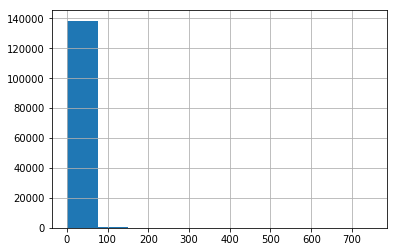

In [39]:
# how many products do we have?
grouped = clean_df.groupby("product_parent")
unique_products = len(grouped)
unique_product_percentage = round(unique_products / len(clean_df) * 100)
print(f"unique products: {unique_product_percentage}% ({unique_products} out of {len(clean_df)})")
# print(grouped.size().describe())
# # 170k products - most only have 1 reviews

grouped.size().hist()

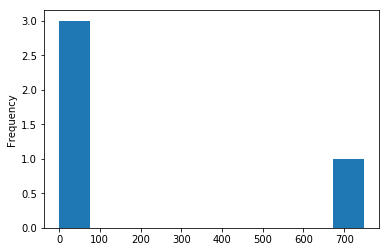

In [48]:
quantile_list = [0., .25, .75, 1.]
quantiles = grouped.size().quantile(quantile_list)
quantiles.plot(kind='hist')

## ??? I want to filter after group by to see what the day looks like, but this code commented below runs super slow

In [8]:
# ???is there a better way to do this????
# can we do some type of quantile or adaptive binning that would make sense?


# # how many products have 1 reviews
# products_one_review = len(clean_df.groupby("product_parent").filter(lambda x: len(x) == 1).groupby("product_parent"))

# # how many products have 2 to 3 reviews
# products_two_reviews = len(clean_df.groupby("product_parent").filter(lambda x: 2 <= len(x) <= 3).groupby("product_parent"))

# # only 39k products have > 3 reviews
# products_three_plus_reviews = len(clean_df.groupby("product_parent").filter(lambda x: len(x) > 3).groupby("product_parent"))



# print(f"1 review:\t{round(products_one_review/total_products, 2) * 100}% ({products_one_review})")
# print(f"2-3 review:\t {round(products_two_reviews/total_products, 2) * 100}% ({products_two_reviews})")
# print(f"3+ review:\t {round(products_three_plus_reviews/total_products, 2) * 100}% ({products_three_plus_reviews})")



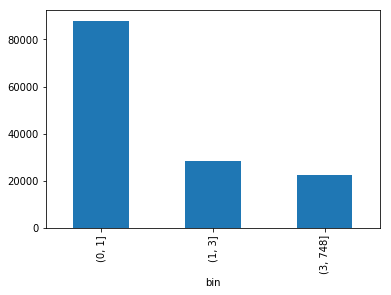

In [9]:
# trying some type of binning

products_df = pd.DataFrame(clean_df.groupby("product_parent").size(), columns=["count"])
products_df = products_df.assign(bin=lambda x: pd.cut(x["count"], [0, 1, 3, x["count"].max()]))
products_df.groupby("bin").size().plot(kind='bar')

# let's look at review distribution dates

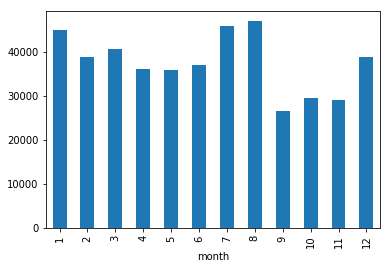

In [10]:
# distribution of months

df = clean_df
df["month"] = df.review_date.dt.month
df.groupby("month").size().plot(kind='bar')

In [11]:
# let's check to see if this is correct

print(df["review_date"].min())
print(df["review_date"].max())

1998-12-26 00:00:00
2015-08-31 00:00:00


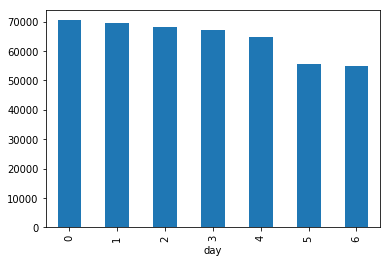

In [12]:
# distribution of days of the week
# distribution of months

df = clean_df
df["day"] = df.review_date.dt.dayofweek
df.groupby("day").size().plot(kind='bar')

# Review Stars Distribution

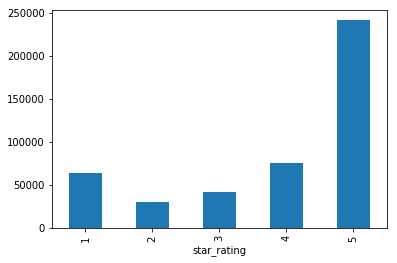

In [13]:
# let's look at distribution of stars
clean_df.groupby("star_rating").size().plot(kind='bar')
# reviews lean heavily towards 5-stars

In [14]:
# let's look at what percentage of reviews have votes
print(f"{round(len(clean_df[(clean_df.total_votes > 0)]) / len(clean_df), 2)* 100} percent "\
      f"({len(clean_df[(clean_df.total_votes > 0)])}) has votes")
# let's look at what percentage of reviews have votes
print(f"{round(len(clean_df[(clean_df.helpful_votes > 0)]) / len(clean_df), 2)* 100} percent "\
            f"({len(clean_df[(clean_df.helpful_votes > 0)])}) has helpful votes")


# let's look at distribution of total_votes
clean_df.describe()
# looks like most do not have any votes

27.0 percent (119481) has votes
21.0 percent (92863) has helpful votes


,customer_id,product_parent,star_rating,helpful_votes,total_votes,month,day
count,4.500720e+05,4.500720e+05,450072.000000,450072.000000,450072.000000,450072.000000,450072.000000
mean,2.549374e+07,5.012325e+08,3.890144,0.886789,1.153622,6.235176,2.826308
std,1.580683e+07,2.880465e+08,1.463683,9.677613,10.437363,3.441635,1.969155
min,1.014100e+04,4.101000e+03,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.234354e+07,2.519991e+08,3.000000,0.000000,0.000000,3.000000,1.000000
50%,2.341612e+07,5.007431e+08,5.000000,0.000000,0.000000,6.000000,3.000000
75%,4.041625e+07,7.501985e+08,5.000000,0.000000,1.000000,9.000000,4.000000
max,5.309655e+07,9.999930e+08,5.000000,2186.000000,2252.000000,12.000000,6.000000


# Review Headlines

Looks like the most frequent number of words in headline is 2

50% have 2700 words or less in headlines

count        33.000000
mean      13638.545455
std       33101.153839
min           1.000000
25%         135.000000
50%         948.000000
75%       11019.000000
max      180832.000000
dtype: float64


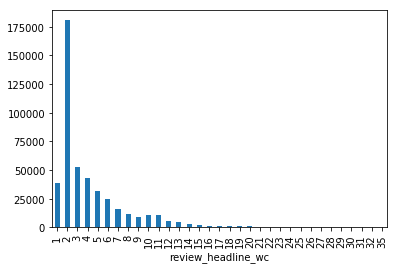

In [15]:
# let's look at wordcount for headlines
df = clean_df
# this doesn't work
# df = df.apply(review_headline_wc=lambda x: len(x["review_headline"].str.split()))
# this doesn't work either - seems to be applying split across all headlines
# df["review_headline_wc"] = df["review_headline"].str.split().count()


df["review_headline_wc"] = df["review_headline"].apply(lambda x: len(x.split()))

grouped = df.groupby("review_headline_wc")
print(grouped.size().describe())

grouped.size().plot(kind='bar')

In [16]:
grouped.size()

review_headline_wc
1      38743
2     180832
3      52599
4      42836
5      31966
6      24460
7      16229
8      11821
9       9096
10     11019
11     10409
12      5315
13      4187
14      2852
15      1772
16      1314
17       948
18       789
19       634
20       787
21       514
22       255
23       188
24       154
25       135
26       105
27        61
28        33
29        10
30         5
31         2
32         1
35         1
dtype: int64

## Interesting.. If you use Pandas, the ones with largest wc grabbed multiple rows

In [17]:
df = clean_df
for index, row in df[(df["review_headline_wc"] == df.review_headline_wc.max())].head(1).iterrows():
    print(f'{index} headline: [{row["review_headline"]}]')
    print(f'{index} body: [{row["review_body"]}]')
clean_df.info()

384053 headline: [Exactly as described.  Love it! Will do business with them again. ... . . . . . . . . . . . . . . . . . . . .  . . .]
384053 body: [Exactly as described.  Love it! Will do business with them again. ... . . . . . . . . . . . . . . . . . . . .  . . .]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 450072 entries, 0 to 450100
Data columns (total 15 columns):
customer_id           450072 non-null int64
review_id             450072 non-null object
product_id            450072 non-null object
product_parent        450072 non-null int64
product_title         450072 non-null object
product_category      450072 non-null object
star_rating           450072 non-null int64
helpful_votes         450072 non-null int64
total_votes           450072 non-null int64
review_headline       450072 non-null object
review_body           450072 non-null object
review_date           450072 non-null datetime64[ns]
month                 450072 non-null int64
day                   450072 non-n

# Review Body

In [18]:
df = clean_df

# now let's look at distribution of wc for review body
df["review_body_wc"] = df["review_body"].apply(lambda x: len(x.split()))

df.head()

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date,month,day,review_headline_wc,review_body_wc
0,6042304,R2DRG0UZXJQ0PE,B00TN4J1TA,716174627,Anker Aluminum Multi-Angle Universal Phone and...,Wireless,5,0,0,Five Stars,This is well worth the money.,2015-08-31,8,0,2,6
1,1393265,R2ZHHWBPM9FBD8,B00KVAUEFK,91818040,"Xperia Z2 Case, MOTOMO [Black] SONY Xperia Z2 ...",Wireless,5,0,0,Five Stars,love it,2015-08-31,8,0,2,2
2,3834496,R3VKL3BZ460UIX,B00G9AT7LI,66852532,LifeProof FRE iPhone 5c Waterproof Case - Reta...,Wireless,5,0,0,Five Stars,Everything was great. Thank you.,2015-08-31,8,0,2,5
3,48623501,R1G7J2VAMI4AEC,B00LBK7QBY,361030039,"Universal Waterproof Case, JOTO CellPhone Dry ...",Wireless,5,0,0,Good product. Please note that it is not a ...,Good product. Please note that it is not a fl...,2015-08-31,8,0,10,33
4,17859156,R348421ZSQV6E4,B00DY6KZ2A,679544351,amPen New Hybrid Stylus Replacement Tip (5-Pack),Wireless,5,0,0,Five Stars,Works well and the replacement tips make it a ...,2015-08-31,8,0,2,11


In [19]:
max_wc = df.review_body_wc.max()
min_wc = df.review_body_wc.min()
print(f"min review wc: {min_wc} max review wc: {max_wc}")

min review wc: 1 max review wc: 6675


## we need to strip reviews with 0 wc

In [20]:
# min review wc
for index, row in df[(df["review_body_wc"] == df.review_body_wc.min())].head(1).iterrows():
    print(f'{index} headline: [{row["review_headline"]}]')
    print(f'{index} body: [{row["review_body"]}]')


48 headline: [Five Stars]
48 body: [Great]


In [21]:
for index, row in df[(df["review_body_wc"] == df.review_body_wc.max())].head(1).iterrows():
    print(f'{index} headline: [{row["review_headline"]}]')
    print(f'{index} body: [{row["review_body"]}]')


323442 headline: [A competent Galaxy Nexus replacement, [KitKat 4.4.4 update]...]
323442 body: [[updated Jul 15th 2014; OS update 21.11.21 applied -- see paragraphs marked with /// for my edits]<br />[updated Jan 27th 2014; OS update 19.5.3 applied -- see paragraphs marked with +++ for my edits]<br />[updated Nov 11th 2013; OS update 12.15.15 applied -- increased my rating to 5 stars (from 4) -- see paragraphs marked with >> for my edits]<br /><br />I didn't intend to buy a Droid Maxx on launch day; at least, not until a few minutes before 10am, when I read on Droid Life it would *really* be in stores that morning. I would only stop in to check it out in person. Then... it just happened. If you're like me and coming from a Samsung Galaxy Nexus, I'm betting this latest batch from Motorola caught your eye, too. I fully intended to wait for the first reviews, maybe check out the oversized Note III and HTC One Max, and see what LG was bringing to the table, but...<br /><br />/// The Maxx's

## interesting find. We need to strip HTML newlines from the text
## also need to strip numeric characters from reviews


Looks like most 50% of reviews have 6 words or less

At 75% percentile we start seeing reviews with 6+ words

In [22]:
df = clean_df

# now let's look at distribution of wc for review body
df["review_body_wc"] = df["review_body"].apply(lambda x: len(x.split()))

grouped = df.groupby("review_body_wc")
print(grouped.size().describe())

count     1266.000000
mean       355.507109
std       1484.914756
min          1.000000
25%          2.000000
50%          5.000000
75%         41.000000
max      18063.000000
dtype: float64


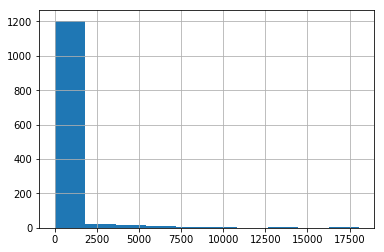

In [23]:
df.groupby("review_body_wc").size().hist()

In [24]:
# let's plot by quantile

quantile_list = [0, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1.]
quantiles = df["review_body_wc"].quantile(quantile_list)

print(quantiles)

df = df.assign(review_body_quantile=lambda x: pd.cut(x["review_body_wc"], quantiles.array))
df.head(5)

0.0       1.0
0.1       4.0
0.2       9.0
0.3      18.0
0.4      22.0
0.5      27.0
0.6      34.0
0.7      46.0
0.8      65.0
0.9     106.0
1.0    6675.0
Name: review_body_wc, dtype: float64


,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date,month,day,review_headline_wc,review_body_wc,review_body_quantile
0,6042304,R2DRG0UZXJQ0PE,B00TN4J1TA,716174627,Anker Aluminum Multi-Angle Universal Phone and...,Wireless,5,0,0,Five Stars,This is well worth the money.,2015-08-31,8,0,2,6,"(4.0, 9.0]"
1,1393265,R2ZHHWBPM9FBD8,B00KVAUEFK,91818040,"Xperia Z2 Case, MOTOMO [Black] SONY Xperia Z2 ...",Wireless,5,0,0,Five Stars,love it,2015-08-31,8,0,2,2,"(1.0, 4.0]"
2,3834496,R3VKL3BZ460UIX,B00G9AT7LI,66852532,LifeProof FRE iPhone 5c Waterproof Case - Reta...,Wireless,5,0,0,Five Stars,Everything was great. Thank you.,2015-08-31,8,0,2,5,"(4.0, 9.0]"
3,48623501,R1G7J2VAMI4AEC,B00LBK7QBY,361030039,"Universal Waterproof Case, JOTO CellPhone Dry ...",Wireless,5,0,0,Good product. Please note that it is not a ...,Good product. Please note that it is not a fl...,2015-08-31,8,0,10,33,"(27.0, 34.0]"
4,17859156,R348421ZSQV6E4,B00DY6KZ2A,679544351,amPen New Hybrid Stylus Replacement Tip (5-Pack),Wireless,5,0,0,Five Stars,Works well and the replacement tips make it a ...,2015-08-31,8,0,2,11,"(9.0, 18.0]"


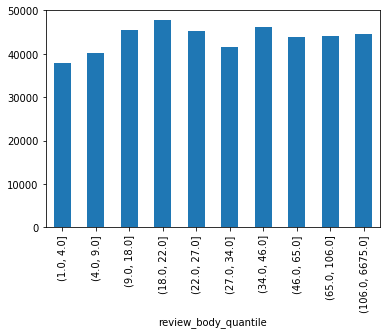

In [25]:
df.groupby("review_body_quantile").size().plot(kind='bar')

In [26]:
# let's try fixed binning - 10 fixed bins
max_wc = df.review_body_wc.max()


fixed_bin = df.assign(review_body_fixed_bin=lambda x: pd.cut(x["review_body_wc"], 
                       np.arange(0, max_wc, round(max_wc/10,0))))
fixed_bin.head(5)

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date,month,day,review_headline_wc,review_body_wc,review_body_quantile,review_body_fixed_bin
0,6042304,R2DRG0UZXJQ0PE,B00TN4J1TA,716174627,Anker Aluminum Multi-Angle Universal Phone and...,Wireless,5,0,0,Five Stars,This is well worth the money.,2015-08-31,8,0,2,6,"(4.0, 9.0]","(0.0, 668.0]"
1,1393265,R2ZHHWBPM9FBD8,B00KVAUEFK,91818040,"Xperia Z2 Case, MOTOMO [Black] SONY Xperia Z2 ...",Wireless,5,0,0,Five Stars,love it,2015-08-31,8,0,2,2,"(1.0, 4.0]","(0.0, 668.0]"
2,3834496,R3VKL3BZ460UIX,B00G9AT7LI,66852532,LifeProof FRE iPhone 5c Waterproof Case - Reta...,Wireless,5,0,0,Five Stars,Everything was great. Thank you.,2015-08-31,8,0,2,5,"(4.0, 9.0]","(0.0, 668.0]"
3,48623501,R1G7J2VAMI4AEC,B00LBK7QBY,361030039,"Universal Waterproof Case, JOTO CellPhone Dry ...",Wireless,5,0,0,Good product. Please note that it is not a ...,Good product. Please note that it is not a fl...,2015-08-31,8,0,10,33,"(27.0, 34.0]","(0.0, 668.0]"
4,17859156,R348421ZSQV6E4,B00DY6KZ2A,679544351,amPen New Hybrid Stylus Replacement Tip (5-Pack),Wireless,5,0,0,Five Stars,Works well and the replacement tips make it a ...,2015-08-31,8,0,2,11,"(9.0, 18.0]","(0.0, 668.0]"


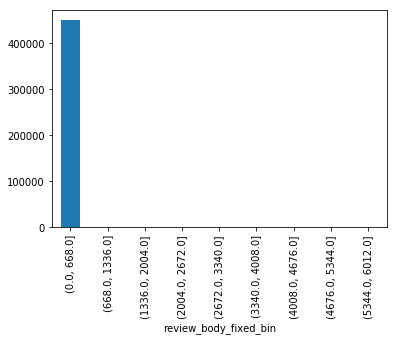

In [27]:
fixed_bin.groupby("review_body_fixed_bin").size().plot(kind='bar')

# Conslusion

looks like Yelp reviews tends to be more verbose than Amazon

90% of Amazon reviews have ~80 words or less compared to yelp reviews which is around ~55%

## Update - 4/25 - Pandas is having issues reading the lines correctly for Amazon reviews so I think some of this data is incorrect

